# Libraries

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(tidyverse)
library(ggtree)
library(ggstance)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: ggtree v3.4.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR
Jones, T Bradley, H Zhu, Y 

In [3]:
%%R
all_best_hits <- read_csv("data/Enterobacteriales_all_best_hits.csv")

all_best_hits

Rows: 16524 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): qseqid, sseqid, component, cinful_id, pephash, sample, contig, seq
dbl (13): pident, length, mismatch, gapopen, qstart, qend, sstart, send, eva...
lgl  (4): hmmerHit, verified, allStandardAA, signalMatch

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 16,524 × 25
   qseqid        sseqid pident length mismatch gapopen qstart  qend sstart  send
   <chr>         <chr>   <dbl>  <dbl>    <dbl>   <dbl>  <dbl> <dbl>  <dbl> <dbl>
 1 v1_PLS_27c29… L_tr_…   55.3     47       21       0      1    47      1    47
 2 v1_PLS_6758c… V_sp_…   40.6     32       19       0      1    32      1    32
 3 v1_PLS_e0e0c… PDI_t…   35.2     88       48       3      1    81      4    89
 4 v1_PLS_7e97d… N_tr_…   46.4     28       13       1      1    28      1    26
 

In [4]:
%%R
all_best_hits %>%
	count(sample)

# A tibble: 5,030 × 2
   sample                                                                      n
   <chr>                                                                   <int>
 1 Enterobacteriaceae_gtdb/Cronobacter/Atlantibacter_hermannii/refseq/bac…     1
 2 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     1
 3 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     3
 4 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     1
 5 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     2
 6 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     1
 7 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     1
 8 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     1
 9 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     1
10 Enterobacteriaceae_gtdb/Cronobacter/Cronobacter_dublinensis/refseq/bac…     1
# … wi

In [5]:
%%R 
Enterobacteriaciae_species_tree <- read.tree("data/Enterobacteriaciae_species.tree")

In [6]:
%%R
samples <- read.table("data/Enterobacteriales_samples.txt", header = FALSE) %>%
	as.tibble() %>%
	rename(path = V1)
samples

# A tibble: 5,142 × 1
   path                                                                         
   <chr>                                                                        
 1 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
 2 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
 3 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
 4 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
 5 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
 6 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
 7 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
 8 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
 9 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
10 genomes/Enterobacterales/alnajar2017phylogenomics/Enterobacteriaceae_gtdb/ot…
# … wi

So it'll take a bit of fenagling to get this wrangled and sorted out, but I'm really hoping that this only includes the data I need and not a bunch of random redundant samples since I ran cinful on the entire directory. The first three fields should all be the same, it shouldn't be until the fourth that something starts to happen.



In [7]:
%%R 
samples %>%
separate(path, c("f1","f2","f3"), sep = "/") %>%
	count(f1,f2,f3)

# A tibble: 1 × 4
  f1      f2               f3                           n
  <chr>   <chr>            <chr>                    <int>
1 genomes Enterobacterales alnajar2017phylogenomics  5142


In [8]:
%%R 
samples %>%
separate(path, c(NA,NA,NA,"f4"), sep = "/") %>%
	count(f4)

# A tibble: 4 × 2
  f4                          n
  <chr>                   <int>
1 Enterobacteriaceae_gtdb  4859
2 Pasteurellaceae_gtdb       68
3 refseq                     72
4 Vibrionaceae_gtdb         143


In [9]:
%%R 
samples %>%
separate(path, c(NA,NA,NA,"f4","f5"), sep = "/") %>%
	filter(f4 == "Enterobacteriaceae_gtdb") %>%
	count(f5)

# A tibble: 6 × 2
  f5                 n
  <chr>          <int>
1 Cronobacter      458
2 Enterobacter    1129
3 Escherichia     1285
4 Klebsiella      1879
5 Kosakonia         23
6 other_families    85


In [10]:
%%R -o speciesAssemblies
speciesAssemblies <- samples %>%
separate(path, c(NA,NA,NA,"f4","f5","f6"), sep = "/") %>%
	filter(f4 == "Enterobacteriaceae_gtdb") %>%
	filter(f5 != "other_families") %>%
	count(f5,f6) %>%
	rename(clade = f5, species = f6, assemblies = n)

In [11]:
speciesAssemblies

,clade,species,assemblies
1,Cronobacter,Atlantibacter_hermannii,5
2,Cronobacter,Cronobacter_dublinensis,38
3,Cronobacter,Cronobacter_malonaticus,44
4,Cronobacter,Cronobacter_sakazakii,371
5,Enterobacter,Enterobacter_asburiae,8
6,Enterobacter,Enterobacter_cancerogenus,13
7,Enterobacter,Enterobacter_cloacae,106
8,Enterobacter,Enterobacter_hormaechei,808
9,Enterobacter,Enterobacter_kobei,105
10,Enterobacter,Enterobacter_ludwigii,66


In [12]:
%%R
all_best_hits %>%
	select(cinful_id) %>%
	separate(cinful_id, c(NA,"clade","species"), sep = "/", remove = FALSE) %>%
	filter(clade != "other_families")

# A tibble: 16,303 × 3
   cinful_id                                                       clade species
   <chr>                                                           <chr> <chr>  
 1 Enterobacteriaceae_gtdb/Escherichia/Citrobacter_braakii/refseq… Esch… Citrob…
 2 Enterobacteriaceae_gtdb/Escherichia/Citrobacter_braakii/refseq… Esch… Citrob…
 3 Enterobacteriaceae_gtdb/Escherichia/Citrobacter_braakii/refseq… Esch… Citrob…
 4 Enterobacteriaceae_gtdb/Klebsiella/Klebsiella_pneumoniae/refse… Kleb… Klebsi…
 5 Enterobacteriaceae_gtdb/Klebsiella/Klebsiella_pneumoniae/refse… Kleb… Klebsi…
 6 Enterobacteriaceae_gtdb/Klebsiella/Klebsiella_pneumoniae/refse… Kleb… Klebsi…
 7 Enterobacteriaceae_gtdb/Klebsiella/Klebsiella_pneumoniae/refse… Kleb… Klebsi…
 8 Enterobacteriaceae_gtdb/Klebsiella/Klebsiella_pneumoniae/refse… Kleb… Klebsi…
 9 Enterobacteriaceae_gtdb/Klebsiella/Klebsiella_pneumoniae/refse… Kleb… Klebsi…
10 Enterobacteriaceae_gtdb/Klebsiella/Klebsiella_pneumoniae/refse… Kleb… Klebsi…
# … w

In [13]:
%%R
Enterobacteriaceae_best_hits <- all_best_hits %>%
	separate(cinful_id, c("f1","clade","species"), sep = "/", remove = FALSE) %>%
	filter(f1 == "Enterobacteriaceae_gtdb") %>%
	filter(clade != "other_families")

Enterobacteriaceae_best_hits

# A tibble: 15,957 × 28
   qseqid        sseqid pident length mismatch gapopen qstart  qend sstart  send
   <chr>         <chr>   <dbl>  <dbl>    <dbl>   <dbl>  <dbl> <dbl>  <dbl> <dbl>
 1 v1_PLS_fa4a6… I47_t…   34.3     35       20       2     25    59     15    46
 2 v1_PLS_8af25… I47_t…   50       18        9       0     24    41     17    34
 3 v1_PLS_88895… L_tr_…   53.3     15        7       0      1    15      1    15
 4 v1_PLS_88895… L_tr_…   53.3     15        7       0      1    15      1    15
 5 v1_PLS_88895… L_tr_…   53.3     15        7       0      1    15      1    15
 6 v1_PLS_88895… L_tr_…   53.3     15        7       0      1    15      1    15
 7 v1_PLS_88895… L_tr_…   53.3     15        7       0      1    15      1    15
 8 v1_PLS_88895… L_tr_…   53.3     15        7       0      1    15      1    15
 9 v1_PLS_88895… L_tr_…   53.3     15        7       0      1    15      1    15
10 v1_PLS_88895… L_tr_…   53.3     15        7       0      1    15      1    15
# … 

In [14]:
%%R
Enterobacteriaceae_best_hits %>%
    filter(component == "microcins.verified") %>%
    count(species, name = "n_microcins", )


# A tibble: 32 × 2
   species                  n_microcins
   <chr>                          <int>
 1 Atlantibacter_hermannii            1
 2 Citrobacter_amalonaticus           2
 3 Citrobacter_braakii               13
 4 Citrobacter_koseri                 2
 5 Citrobacter_werkmanii              2
 6 Citrobacter_youngae                1
 7 Cronobacter_dublinensis            9
 8 Cronobacter_malonaticus            3
 9 Cronobacter_sakazakii             48
10 Enterobacter_asburiae              2
# … with 22 more rows


In [15]:
%%R
species_microcins <- Enterobacteriaceae_best_hits %>%
	filter(component == "microcins.verified") %>%
	count(species, sample) %>% 
	count(species, name = "n_microcins") %>%
	full_join(speciesAssemblies) %>%
	mutate(percent_microcin = n_microcins / assemblies)

species_microcins

Joining, by = "species"
# A tibble: 32 × 5
   species                  n_microcins clade        assemblies percent_microcin
   <chr>                          <int> <chr>             <int>            <dbl>
 1 Atlantibacter_hermannii            1 Cronobacter           5           0.2   
 2 Citrobacter_amalonaticus           2 Escherichia          41           0.0488
 3 Citrobacter_braakii               11 Escherichia          91           0.121 
 4 Citrobacter_koseri                 2 Escherichia          36           0.0556
 5 Citrobacter_werkmanii              2 Escherichia          28           0.0714
 6 Citrobacter_youngae                1 Escherichia          25           0.04  
 7 Cronobacter_dublinensis            8 Cronobacter          38           0.211 
 8 Cronobacter_malonaticus            3 Cronobacter          44           0.0682
 9 Cronobacter_sakazakii             46 Cronobacter         371           0.124 
10 Enterobacter_asburiae              2 Enterobacter          8   

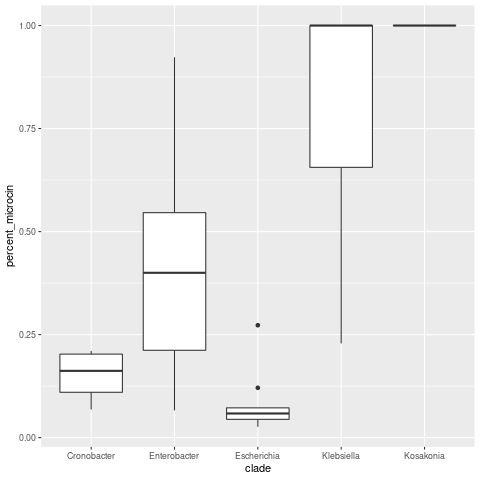

In [16]:
%%R
species_microcins %>%
	ggplot(aes( x = clade, y = percent_microcin)) + 
		geom_boxplot()
		

So that is basically what it needs to be, I also need to eventually filter this out by hmmer hits, but for now, I will go forward to get the tree plot going.

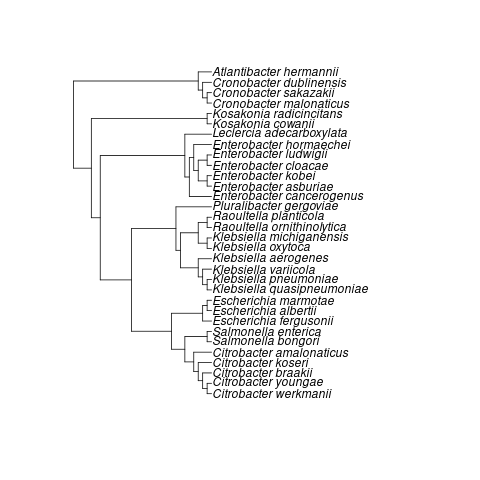

In [17]:
%%R
Enterobacteriaciae_species_tree$tip.label<-gsub("_"," ",Enterobacteriaciae_species_tree$tip.label)
species_microcins$species <- gsub("_"," ",species_microcins$species)
plot(Enterobacteriaciae_species_tree)

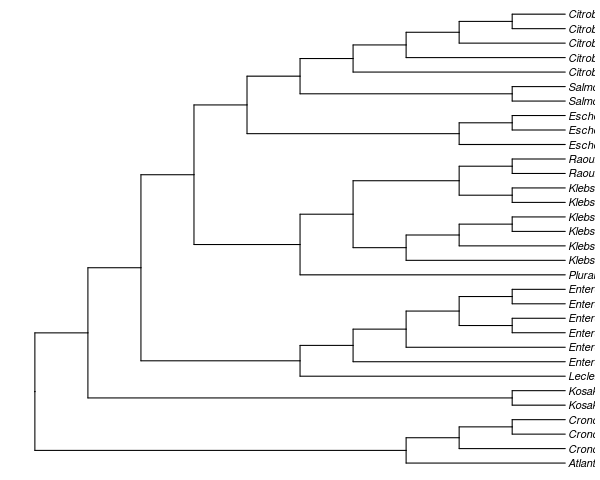

In [18]:
%%R -w 600
species_tree_plot <- ggtree(Enterobacteriaciae_species_tree) +
	geom_tiplab(as_ylab=FALSE, fontface=3)
#	  xlim(0, 0)

species_tree_plot

In [19]:
%%R
species_microcins$clade <- factor(species_microcins$clade, levels = c("Escherichia","Klebsiella","Enterobacter","Kosakonia","Cronobacter"))


In [20]:
%%R
species_microcins %>%
	filter(!(species %in% Enterobacteriaciae_species_tree$tip.label))


# A tibble: 0 × 5
# … with 5 variables: species <chr>, n_microcins <int>, clade <fct>,
#   assemblies <int>, percent_microcin <dbl>


In [21]:
%%R
species_microcins_hmmer <- Enterobacteriaceae_best_hits %>%
	filter(component == "microcins.verified") %>%
	filter(hmmerHit == TRUE) %>%
	count(species, sample) %>% 
	count(species, name = "n_microcins") %>%
	full_join(speciesAssemblies) %>%
	mutate(percent_microcin = n_microcins / assemblies)

species_microcins_hmmer

species_microcins_hmmer %>%
	write_csv("data/supplemental/species_microcin_hmmer.csv")

Joining, by = "species"


In [22]:
%%R
species_microcins_hmmer$species <- gsub("_"," ",species_microcins_hmmer$species)
species_microcins_hmmer$clade <- factor(species_microcins_hmmer$clade, levels = c("Escherichia","Klebsiella","Enterobacter","Kosakonia","Cronobacter"))

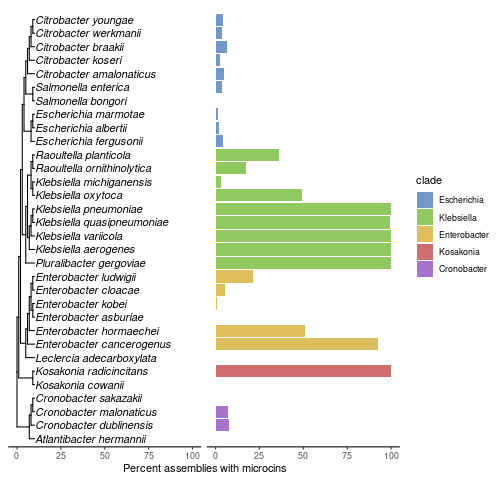

In [23]:
%%R -w 500
# species_tree_plot + 
# geom_facet(panel = "Trait", data = species_microcins, geom = geom_barh, 
#                 aes(x = percent_microcin), width = .6)
species_tree_microcin_plot <- facet_plot(species_tree_plot + 
    xlim(0, 100), 
    panel = "percent microcin", 
    data = species_microcins_hmmer,
    geom = geom_barh,
    mapping = aes(x = percent_microcin*100, fill = clade),
    stat="identity") +
    scale_fill_manual(values=c(
        "#7397c7ff", 
        "#8fc960ff", 
        "#dfbf5dff",
        "#cf6e6eff",
        "#a674cbff")) +
    theme_tree2(strip.background = element_blank(),
    strip.text.x = element_blank(),
        # text = element_text(size = 20)
        ) +
    xlab("Percent assemblies with microcins")

    # xlim(0, 0.1)
species_tree_microcin_plot

#ggsave("plots/05_Enterobacteriaceae_microcin_phylogeny.svg")